# IBM Capstone Project in Applied Data Science: The Battle of the Neighborhoods


## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import sklearn.metrics as smetrics
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandas import read_csv
from matplotlib import pyplot

In [2]:
import lux

In [3]:
from bs4 import BeautifulSoup 
import requests 
page = requests.get("https://www.google.dz/search?q=see") 
soup = BeautifulSoup(page.content) 
links = soup.findAll("a") 
for link in links: 
    if link['href'].startswith('/url?q='): 
        print (link['href'].replace('/url?q=',''))

https://en.wikipedia.org/wiki/See_(TV_series)&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQmhMwCHoECBQQDg&usg=AOvVaw1zXZcW-X6G_ol5zdQDL0lY
https://en.wikipedia.org/wiki/See_(TV_series)&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQFjAZegQIBRAB&usg=AOvVaw31TVE-8ggVA8RwbV4h-aDt
https://en.wikipedia.org/wiki/Joshua_Henry&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQ0gIwGXoECAUQAg&usg=AOvVaw1sf056E77RgiSgYGcGWRpc
https://en.wikipedia.org/wiki/Yadira_Guevara-Prip&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQ0gIwGXoECAUQAw&usg=AOvVaw08-KTnNUQOT6-LBwnJWz9P
https://en.wikipedia.org/wiki/Mojean_Aria&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQ0gIwGXoECAUQBA&usg=AOvVaw3Vr2H7Y45ddNYmkC45KU2z
https://en.wikipedia.org/wiki/See_(TV_series)%23Episodes&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQs2YwGXoECAUQCA&usg=AOvVaw26DL9BSEWlkxurtHNt6sw8
https://en.wikipedia.org/wiki/British_Columbia&sa=U&ved=2ahUKEwiymdittL7wAhUqqZUCHYyrAsEQs2YwGXoECAUQCw&usg=AOvVaw1eI2_zj6A2jf_NNw-3kycO
https://www.imdb.com/title/tt7949218/&sa=

In [4]:
import numpy as np # library to handle data in a vectorized manner
!pip install geocoder
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
!pip install folium
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [5]:
import geopy

## Scrapping data from Wikipedia

In [6]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Suburbs_of_Durban").text

In [7]:

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [8]:
# create a list to store surburbs data
surbubslist = []

In [9]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    surbubslist.append(row.text)

## Getting the list of surbubs in Durban

In [10]:
# create a new DataFrame from the list
subs_df = pd.DataFrame({"Surbubs": surbubslist})

subs_df

Surbubs
0        List of Durban suburbs
1            Asherville, Durban
2                  Athlone Park
3               Athlone, Durban
4                 Avoca, Durban
5              Bellaire, Durban
6                 Berea, Durban
7          Bluff, KwaZulu-Natal
8                Bonela, Durban
9                  Botha's Hill
10             Broadway, Durban
11                   Cato Manor
12                  Cowies Hill
13                 Durban North
14            Essenwood, Durban
15          Forest Hills, Kloof
16                     Gillitts
17      Glenwood, KwaZulu-Natal
18            Greyville, Durban
19         Kennedy Road, Durban
20             Kenville, Durban
21                        Kloof
22                     KwaMashu
23                     La Lucia
24           Lotus Park, Durban
25                     Magabeni
26                  Mariannhill
27             Mayville, Durban
28            Montclair, Durban
29          Morningside, Durban
30         Mount Vernon, Durban
31             Musgrave, Durban
32          North Beach, Durban
33        Ottawa, KwaZulu-Natal
34                     Overport
35              Palmiet, Durban
36                   Prospecton
37                  Queensburgh
38              Rainbow Gardens
39              Reservoir Hills
40            Ridgeview, Durban
41         Sea Cow Lake, Durban
42           Shallcross, Durban
43             Sherwood, Durban
44          South Beach, Durban
45        Stamford Hill, Durban
46             Sydenham, Durban
47               Umbilo, Durban
48                  Umgeni Park
49                    UMkumbaan
50                       Umlazi
51           Upper Highway Area
52     Wentworth, KwaZulu-Natal
53     Westville, KwaZulu-Natal
54              Wiggins, Durban
55           Windermere, Durban
56  Winston Park, KwaZulu-Natal
57            Woodhaven, Durban
58            Woodlands, Durban
59                      Wyebank
60              Yellowwood Park

In [11]:
subs_df.drop(subs_df.index[0],inplace=True)

In [12]:
# print the number of rows of the dataframe
subs_df.shape

(60, 1)

## Getting latitudes and Longitudes of the surbubs in Durban

In [13]:
# define a function to get coordinates
def get_latlng(surbubs):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Suburbs_of_Durban'.format(surbubs))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [14]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(surbubs) for surbubs in subs_df["Surbubs"].tolist() ]
coords

[[-29.823849999999936, 30.994290000000035],
 [-30.01700999999997, 30.914060000000063],
 [-29.78353151637882, 31.025851405222568],
 [-29.768216982423205, 31.01639445868303],
 [-29.865429715511677, 30.965027464073966],
 [-29.842869999999948, 31.000050000000044],
 [-29.919969999999978, 30.99885000000006],
 [-29.844320889059105, 30.966450529903835],
 [-29.753709999999955, 30.743810000000053],
 [-29.786443646553426, 31.043155995730373],
 [-29.85894315033152, 30.9769483247804],
 [-29.826979999999935, 30.894700000000057],
 [-29.785819999999944, 31.039370000000076],
 [-29.846645285647693, 30.998516016557396],
 [-29.759409999999946, 30.829780000000028],
 [-29.795129999999972, 30.802670000000035],
 [-29.86337999999995, 30.993130000000065],
 [-29.854910418881367, 30.983680646800643],
 [-29.808530039840285, 30.979505485301694],
 [-29.8010482104344, 31.00870551415418],
 [-29.790489999999977, 30.847470000000044],
 [-29.753289999999936, 30.99876000000006],
 [-29.752759999999967, 31.059810000000027],


In [15]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [16]:
# merge the coordinates into the original dataframe
subs_df['Latitude'] = df_coords['Latitude']
subs_df['Longitude'] = df_coords['Longitude']

##  latitude and longitude values to the Surbubs dataFrame

In [17]:
# check the neighborhoods and the coordinates
print(subs_df.shape)
subs_df

(60, 3)


Surbubs   Latitude  Longitude
1            Asherville, Durban -30.017010  30.914060
2                  Athlone Park -29.783532  31.025851
3               Athlone, Durban -29.768217  31.016394
4                 Avoca, Durban -29.865430  30.965027
5              Bellaire, Durban -29.842870  31.000050
6                 Berea, Durban -29.919970  30.998850
7          Bluff, KwaZulu-Natal -29.844321  30.966451
8                Bonela, Durban -29.753710  30.743810
9                  Botha's Hill -29.786444  31.043156
10             Broadway, Durban -29.858943  30.976948
11                   Cato Manor -29.826980  30.894700
12                  Cowies Hill -29.785820  31.039370
13                 Durban North -29.846645  30.998516
14            Essenwood, Durban -29.759410  30.829780
15          Forest Hills, Kloof -29.795130  30.802670
16                     Gillitts -29.863380  30.993130
17      Glenwood, KwaZulu-Natal -29.854910  30.983681
18            Greyville, Durban -29.808530  30.979505
19         Kennedy Road, Durban -29.801048  31.008706
20             Kenville, Durban -29.790490  30.847470
21                        Kloof -29.753290  30.998760
22                     KwaMashu -29.752760  31.059810
23                     La Lucia -29.820752  30.998721
24           Lotus Park, Durban -30.171910  30.772090
25                     Magabeni -29.845780  30.835950
26                  Mariannhill -30.059923  30.881088
27             Mayville, Durban -29.927221  30.964744
28            Montclair, Durban -29.823440  31.024640
29          Morningside, Durban -29.895747  30.934255
30         Mount Vernon, Durban -29.848470  30.997950
31             Musgrave, Durban -29.849300  31.037790
32          North Beach, Durban -29.667650  31.038640
33        Ottawa, KwaZulu-Natal -29.836060  30.999930
34                     Overport -29.818170  30.962079
35              Palmiet, Durban -30.002870  30.930800
36                   Prospecton -29.875460  30.895380
37                  Queensburgh -29.825260  30.882000
38              Rainbow Gardens -29.806750  30.958410
39              Reservoir Hills -29.842719  30.987644
40            Ridgeview, Durban -29.799080  31.000430
41         Sea Cow Lake, Durban -29.887380  30.872070
42           Shallcross, Durban -29.834670  30.974370
43             Sherwood, Durban -29.859540  31.040640
44          South Beach, Durban -29.835561  31.021982
45        Stamford Hill, Durban -29.841490  31.002261
46             Sydenham, Durban -29.883430  30.984430
47               Umbilo, Durban -29.805870  31.017430
48                  Umgeni Park -29.866810  30.959940
49                    UMkumbaan -29.958790  30.849750
50                       Umlazi -29.847030  31.025740
51           Upper Highway Area -29.920044  31.000477
52     Wentworth, KwaZulu-Natal -29.830300  30.936090
53     Westville, KwaZulu-Natal -29.847873  30.954302
54              Wiggins, Durban -29.832590  31.020210
55           Windermere, Durban -29.809130  30.792726
56  Winston Park, KwaZulu-Natal -29.926914  30.947329
57            Woodhaven, Durban -29.925800  30.952400
58            Woodlands, Durban -29.771830  30.871130
59                      Wyebank -29.918150  30.935770
60              Yellowwood Park        NaN        NaN

## Dropping unneccesarry data

In [18]:
subs_df.dropna(inplace=True)

In [19]:
subs_df

Surbubs   Latitude  Longitude
1            Asherville, Durban -30.017010  30.914060
2                  Athlone Park -29.783532  31.025851
3               Athlone, Durban -29.768217  31.016394
4                 Avoca, Durban -29.865430  30.965027
5              Bellaire, Durban -29.842870  31.000050
6                 Berea, Durban -29.919970  30.998850
7          Bluff, KwaZulu-Natal -29.844321  30.966451
8                Bonela, Durban -29.753710  30.743810
9                  Botha's Hill -29.786444  31.043156
10             Broadway, Durban -29.858943  30.976948
11                   Cato Manor -29.826980  30.894700
12                  Cowies Hill -29.785820  31.039370
13                 Durban North -29.846645  30.998516
14            Essenwood, Durban -29.759410  30.829780
15          Forest Hills, Kloof -29.795130  30.802670
16                     Gillitts -29.863380  30.993130
17      Glenwood, KwaZulu-Natal -29.854910  30.983681
18            Greyville, Durban -29.808530  30.979505
19         Kennedy Road, Durban -29.801048  31.008706
20             Kenville, Durban -29.790490  30.847470
21                        Kloof -29.753290  30.998760
22                     KwaMashu -29.752760  31.059810
23                     La Lucia -29.820752  30.998721
24           Lotus Park, Durban -30.171910  30.772090
25                     Magabeni -29.845780  30.835950
26                  Mariannhill -30.059923  30.881088
27             Mayville, Durban -29.927221  30.964744
28            Montclair, Durban -29.823440  31.024640
29          Morningside, Durban -29.895747  30.934255
30         Mount Vernon, Durban -29.848470  30.997950
31             Musgrave, Durban -29.849300  31.037790
32          North Beach, Durban -29.667650  31.038640
33        Ottawa, KwaZulu-Natal -29.836060  30.999930
34                     Overport -29.818170  30.962079
35              Palmiet, Durban -30.002870  30.930800
36                   Prospecton -29.875460  30.895380
37                  Queensburgh -29.825260  30.882000
38              Rainbow Gardens -29.806750  30.958410
39              Reservoir Hills -29.842719  30.987644
40            Ridgeview, Durban -29.799080  31.000430
41         Sea Cow Lake, Durban -29.887380  30.872070
42           Shallcross, Durban -29.834670  30.974370
43             Sherwood, Durban -29.859540  31.040640
44          South Beach, Durban -29.835561  31.021982
45        Stamford Hill, Durban -29.841490  31.002261
46             Sydenham, Durban -29.883430  30.984430
47               Umbilo, Durban -29.805870  31.017430
48                  Umgeni Park -29.866810  30.959940
49                    UMkumbaan -29.958790  30.849750
50                       Umlazi -29.847030  31.025740
51           Upper Highway Area -29.920044  31.000477
52     Wentworth, KwaZulu-Natal -29.830300  30.936090
53     Westville, KwaZulu-Natal -29.847873  30.954302
54              Wiggins, Durban -29.832590  31.020210
55           Windermere, Durban -29.809130  30.792726
56  Winston Park, KwaZulu-Natal -29.926914  30.947329
57            Woodhaven, Durban -29.925800  30.952400
58            Woodlands, Durban -29.771830  30.871130
59                      Wyebank -29.918150  30.935770

In [20]:
# get the coordinates of Durban
address = 'Durban'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_Durban = location.latitude
longitude_Durban = location.longitude
print('The geograpical coordinate of Durban Surburbs are {}, {}.'.format(latitude_Durban, longitude_Durban))


The geograpical coordinate of Durban Surburbs are -29.861825, 31.009909.


## Creating map of Durban using latitude and longitude values

In [21]:

map_Durban = folium.Map(location=[subs_df["Latitude"].iloc[0], subs_df["Longitude"].iloc[0]], zoom_start=11)

# add markers to map
for lat, lng, surbubs in zip(subs_df['Latitude'], subs_df['Longitude'], subs_df['Surbubs']):
    label = '{}'.format(surbubs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Durban)  
    
map_Durban



# Calling FourSquare

In [22]:
CLIENT_ID = 'C5KSCWWPXYBZRT0OGNTF3TO0LX5ZU220HVQK4MZAFD5AQ3J3' # your Foursquare ID
CLIENT_SECRET = '4ZVRIKTIYQ2APMEQOVCHT045A0PCPELAPGGORZ4GGOGFU043' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: C5KSCWWPXYBZRT0OGNTF3TO0LX5ZU220HVQK4MZAFD5AQ3J3
CLIENT_SECRET:4ZVRIKTIYQ2APMEQOVCHT045A0PCPELAPGGORZ4GGOGFU043


In [23]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, surbubs in zip(subs_df['Latitude'], subs_df['Longitude'], subs_df['Surbubs']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            surbubs,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

 ## Converting  the venues list into a new DataFrame

In [24]:
# convert the venues list into a new DataFrame
venues_Durban = pd.DataFrame(venues)

# define the column names
venues_Durban.columns = ['Surbubs', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_Durban.shape)
venues_Durban

(1692, 7)


Surbubs   Latitude  Longitude  \
0              Asherville, Durban -30.017010  30.914060   
1              Asherville, Durban -30.017010  30.914060   
2              Asherville, Durban -30.017010  30.914060   
3              Asherville, Durban -30.017010  30.914060   
4              Asherville, Durban -30.017010  30.914060   
5              Asherville, Durban -30.017010  30.914060   
6              Asherville, Durban -30.017010  30.914060   
7              Asherville, Durban -30.017010  30.914060   
8              Asherville, Durban -30.017010  30.914060   
9                    Athlone Park -29.783532  31.025851   
10                   Athlone Park -29.783532  31.025851   
11                   Athlone Park -29.783532  31.025851   
12                   Athlone Park -29.783532  31.025851   
13                   Athlone Park -29.783532  31.025851   
14                   Athlone Park -29.783532  31.025851   
15                   Athlone Park -29.783532  31.025851   
16                   Athlone Park -29.783532  31.025851   
17                   Athlone Park -29.783532  31.025851   
18                   Athlone Park -29.783532  31.025851   
19                   Athlone Park -29.783532  31.025851   
20                   Athlone Park -29.783532  31.025851   
21                   Athlone Park -29.783532  31.025851   
22                   Athlone Park -29.783532  31.025851   
23                   Athlone Park -29.783532  31.025851   
24                   Athlone Park -29.783532  31.025851   
25                   Athlone Park -29.783532  31.025851   
26                   Athlone Park -29.783532  31.025851   
27                   Athlone Park -29.783532  31.025851   
28                   Athlone Park -29.783532  31.025851   
29                   Athlone Park -29.783532  31.025851   
30                   Athlone Park -29.783532  31.025851   
31                   Athlone Park -29.783532  31.025851   
32                   Athlone Park -29.783532  31.025851   
33                   Athlone Park -29.783532  31.025851   
34                   Athlone Park -29.783532  31.025851   
35                   Athlone Park -29.783532  31.025851   
36                   Athlone Park -29.783532  31.025851   
37                   Athlone Park -29.783532  31.025851   
38                Athlone, Durban -29.768217  31.016394   
39                Athlone, Durban -29.768217  31.016394   
40                Athlone, Durban -29.768217  31.016394   
41                Athlone, Durban -29.768217  31.016394   
42                Athlone, Durban -29.768217  31.016394   
43                Athlone, Durban -29.768217  31.016394   
44                Athlone, Durban -29.768217  31.016394   
45                Athlone, Durban -29.768217  31.016394   
46                Athlone, Durban -29.768217  31.016394   
47                  Avoca, Durban -29.865430  30.965027   
48                  Avoca, Durban -29.865430  30.965027   
49                  Avoca, Durban -29.865430  30.965027   
50                  Avoca, Durban -29.865430  30.965027   
51                  Avoca, Durban -29.865430  30.965027   
52               Bellaire, Durban -29.842870  31.000050   
53               Bellaire, Durban -29.842870  31.000050   
54               Bellaire, Durban -29.842870  31.000050   
55               Bellaire, Durban -29.842870  31.000050   
56               Bellaire, Durban -29.842870  31.000050   
57               Bellaire, Durban -29.842870  31.000050   
58               Bellaire, Durban -29.842870  31.000050   
59               Bellaire, Durban -29.842870  31.000050   
60               Bellaire, Durban -29.842870  31.000050   
61               Bellaire, Durban -29.842870  31.000050   
62               Bellaire, Durban -29.842870  31.000050   
63               Bellaire, Durban -29.842870  31.000050   
64               Bellaire, Durban -29.842870  31.000050   
65               Bellaire, Durban -29.842870  31.000050   
66               Bellaire, Durban -29.842870  31.000050   
67            

In [25]:
print("Shape of df:",venues_Durban.shape)
venues_Durban.head()

Shape of df: (1692, 7)


Surbubs  Latitude  Longitude          VenueName  VenueLatitude  \
0  Asherville, Durban -30.01701   30.91406    Arbour Crossing     -30.026832   
1  Asherville, Durban -30.01701   30.91406  Makro Amanzimtoti     -30.026205   
2  Asherville, Durban -30.01701   30.91406       Shell Select     -30.024551   
3  Asherville, Durban -30.01701   30.91406              Wimpy     -30.027283   
4  Asherville, Durban -30.01701   30.91406           Memories     -30.016938   

   VenueLongitude    VenueCategory  
0       30.907850    Shopping Mall  
1       30.905878  Warehouse Store  
2       30.911213      Gas Station  
3       30.907878       Restaurant  
4       30.920372       Restaurant

### Save our dataFrame as a csv file

In [26]:
venues_Durban.to_csv('Durban_df.csv')

In [27]:
Durban_df=read_csv('Durban_df.csv')
Durban_df.reset_index(drop=True)

Unnamed: 0                      Surbubs   Latitude  Longitude  \
0              0           Asherville, Durban -30.017010  30.914060   
1              1           Asherville, Durban -30.017010  30.914060   
2              2           Asherville, Durban -30.017010  30.914060   
3              3           Asherville, Durban -30.017010  30.914060   
4              4           Asherville, Durban -30.017010  30.914060   
5              5           Asherville, Durban -30.017010  30.914060   
6              6           Asherville, Durban -30.017010  30.914060   
7              7           Asherville, Durban -30.017010  30.914060   
8              8           Asherville, Durban -30.017010  30.914060   
9              9                 Athlone Park -29.783532  31.025851   
10            10                 Athlone Park -29.783532  31.025851   
11            11                 Athlone Park -29.783532  31.025851   
12            12                 Athlone Park -29.783532  31.025851   
13            13                 Athlone Park -29.783532  31.025851   
14            14                 Athlone Park -29.783532  31.025851   
15            15                 Athlone Park -29.783532  31.025851   
16            16                 Athlone Park -29.783532  31.025851   
17            17                 Athlone Park -29.783532  31.025851   
18            18                 Athlone Park -29.783532  31.025851   
19            19                 Athlone Park -29.783532  31.025851   
20            20                 Athlone Park -29.783532  31.025851   
21            21                 Athlone Park -29.783532  31.025851   
22            22                 Athlone Park -29.783532  31.025851   
23            23                 Athlone Park -29.783532  31.025851   
24            24                 Athlone Park -29.783532  31.025851   
25            25                 Athlone Park -29.783532  31.025851   
26            26                 Athlone Park -29.783532  31.025851   
27            27                 Athlone Park -29.783532  31.025851   
28            28                 Athlone Park -29.783532  31.025851   
29            29                 Athlone Park -29.783532  31.025851   
30            30                 Athlone Park -29.783532  31.025851   
31            31                 Athlone Park -29.783532  31.025851   
32            32                 Athlone Park -29.783532  31.025851   
33            33                 Athlone Park -29.783532  31.025851   
34            34                 Athlone Park -29.783532  31.025851   
35            35                 Athlone Park -29.783532  31.025851   
36            36                 Athlone Park -29.783532  31.025851   
37            37                 Athlone Park -29.783532  31.025851   
38            38              Athlone, Durban -29.768217  31.016394   
39            39              Athlone, Durban -29.768217  31.016394   
40            40              Athlone, Durban -29.768217  31.016394   
41            41              Athlone, Durban -29.768217  31.016394   
42            42              Athlone, Durban -29.768217  31.016394   
43            43              Athlone, Durban -29.768217  31.016394   
44            44              Athlone, Durban -29.768217  31.016394   
45            45              Athlone, Durban -29.768217  31.016394   
46            46              Athlone, Durban -29.768217  31.016394   
47            47                Avoca, Durban -29.865430  30.965027   
48            48                Avoca, Durban -29.865430  30.965027   
49            49                Avoca, Durban -29.865430  30.965027   
50            50                Avoca, Durban -29.865430  30.965027   
51            51                Avoca, Durban -29.865430  30.965027   
52            52             Bellaire, Durban -29.842870  31.000050   
53            53             Bellaire, Durban -29.842870  31.000050   
54            54             Bellaire, Durban -29.842870  31.000050   
55            55             B

In [28]:
Durban_df.drop(columns="Unnamed: 0", inplace=True)

# Checking Data Features

In [29]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (1692, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


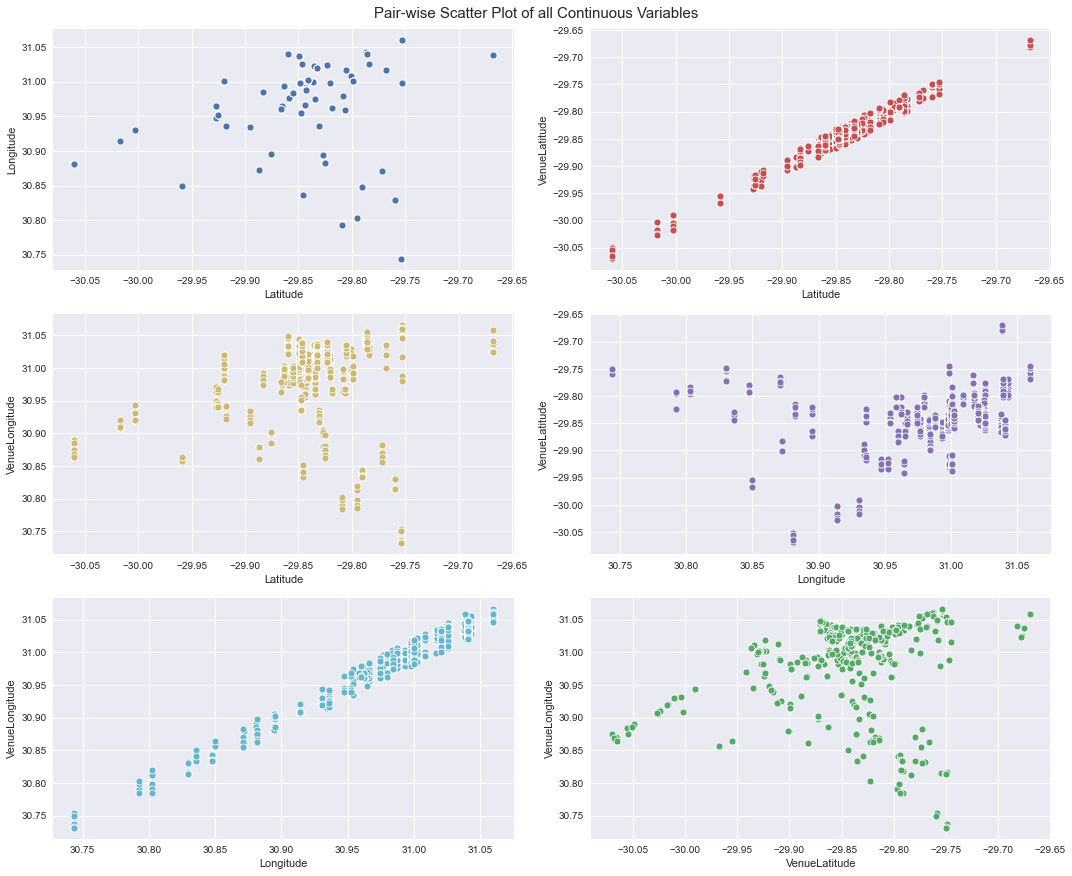

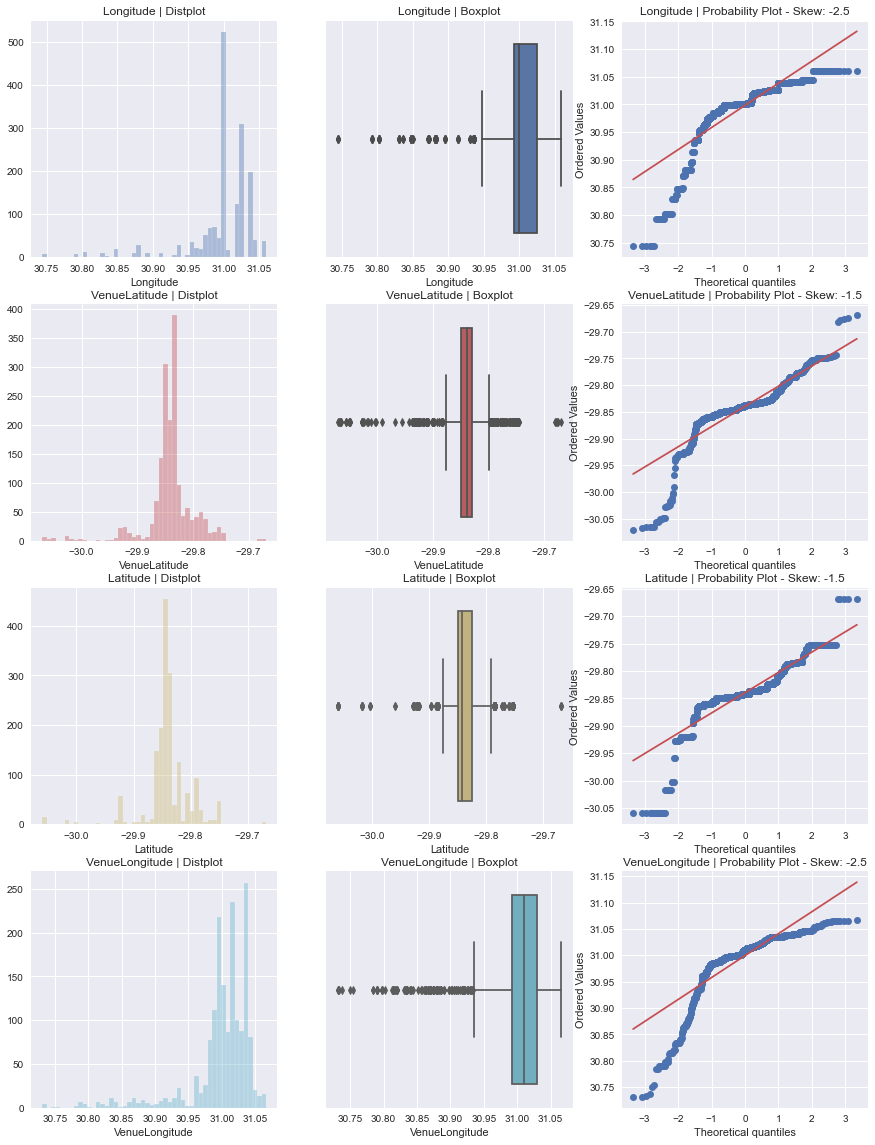

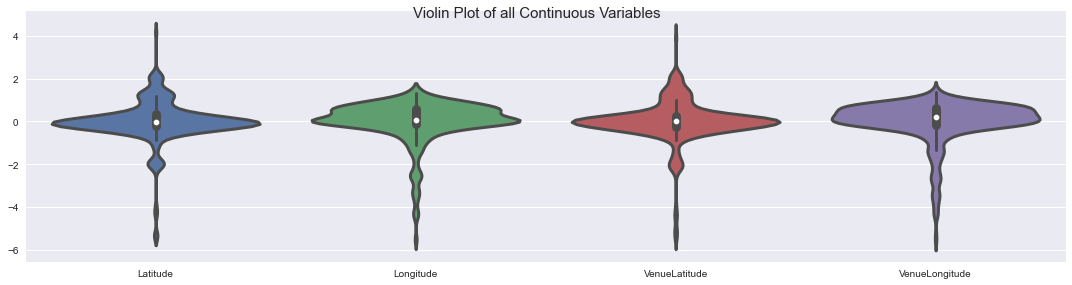

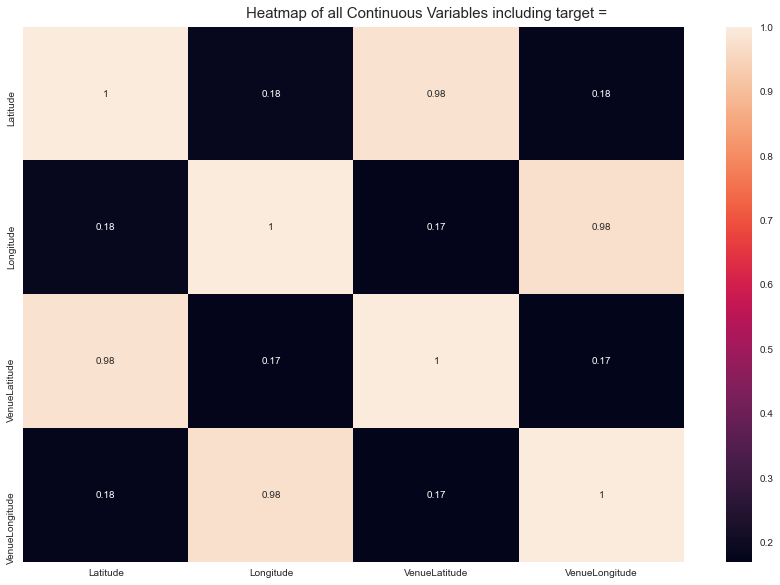

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 12.366

 ###################### VISUALIZATION Completed ########################


In [30]:
filename = "Durban_df.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=40,
)

In [31]:
venues_Durban.groupby('Surbubs').count()

Latitude  Longitude  VenueName  VenueLatitude  \
Surbubs                                                                      
Asherville, Durban                  9          9          9              9   
Athlone Park                       29         29         29             29   
Athlone, Durban                     9          9          9              9   
Avoca, Durban                       5          5          5              5   
Bellaire, Durban                   96         96         96             96   
Berea, Durban                      23         23         23             23   
Bluff, KwaZulu-Natal               14         14         14             14   
Bonela, Durban                      6          6          6              6   
Botha's Hill                       39         39         39             39   
Broadway, Durban                   26         26         26             26   
Cato Manor                          4          4          4              4   
Cowies Hill                        38         38         38             38   
Durban North                       76         76         76             76   
Essenwood, Durban                   8          8          8              8   
Forest Hills, Kloof                11         11         11             11   
Gillitts                           44         44         44             44   
Glenwood, KwaZulu-Natal            45         45         45             45   
Greyville, Durban                  23         23         23             23   
Kennedy Road, Durban               15         15         15             15   
Kenville, Durban                   16         16         16             16   
Kloof                               4          4          4              4   
KwaMashu                           36         36         36             36   
La Lucia                           33         33         33             33   
Magabeni                            3          3          3              3   
Mariannhill                        14         14         14             14   
Mayville, Durban                    4          4          4              4   
Montclair, Durban                  81         81         81             81   
Morningside, Durban                 4          4          4              4   
Mount Vernon, Durban               71         71         71             71   
Musgrave, Durban                   78         78         78             78   
North Beach, Durban                 5          5          5              5   
Ottawa, KwaZulu-Natal              88         88         88             88   
Overport                           11         11         11             11   
Palmiet, Durban                     5          5          5              5   
Prospecton                          4          4          4              4   
Queensburgh                        14         14         14             14   
Rainbow Gardens                     5          5          5              5   
Reservoir Hills                    51         51         51             51   
Ridgeview, Durban                  15         15         15             15   
Sea Cow Lake, Durban                4          4          4              4   
Shallcross, Durban                 24         24         24             24   
Sherwood, Durban                   77         77         77             77   
South Beach, Durban               100        100        100            100   
Stamford Hill, Durban              91         91         91             91   
Sydenham, Durban                   18         18         18             18   
UMkumbaan                           2          2          2              2   
Umbilo, Durban                     20         20         20             20   
Umgeni Park                         5          5          5              5   
Umlazi                            100        100        100            100   
Upper Highway Area                 27         27   



### Drop surbubs with less than 30 venues. These surbubs will be considered less popular


In [198]:
# Filter surbubs
less_popular_surbubs = venues_Durban.groupby('Surbubs').VenueName.count() < 30
less_popular_surbubs = list(less_popular_surbubs[less_popular_surbubs].index)

# duplicate df
Durban_Venues = venues_Durban

# Exclude the subdistricts
for i in less_popular_surbubs:
    Durban_Venues = Durban_Venues[Durban_Venues.Surbubs != i]

In [199]:
 Durban_Venues.groupby('Surbubs').count()

Latitude  Longitude  VenueName  VenueLatitude  \
Surbubs                                                                  
Bellaire, Durban               96         96         96             96   
Botha's Hill                   39         39         39             39   
Cowies Hill                    38         38         38             38   
Durban North                   76         76         76             76   
Gillitts                       44         44         44             44   
Glenwood, KwaZulu-Natal        45         45         45             45   
KwaMashu                       36         36         36             36   
La Lucia                       33         33         33             33   
Montclair, Durban              81         81         81             81   
Mount Vernon, Durban           71         71         71             71   
Musgrave, Durban               78         78         78             78   
Ottawa, KwaZulu-Natal          88         88         88             88   
Reservoir Hills                51         51         51             51   
Sherwood, Durban               77         77         77             77   
South Beach, Durban           100        100        100            100   
Stamford Hill, Durban          91         91         91             91   
Umlazi                        100        100        100            100   
Wiggins, Durban                93         93         93             93   

                         VenueLongitude  VenueCategory  
Surbubs                                                 
Bellaire, Durban                     96             96  
Botha's Hill                         39             39  
Cowies Hill                          38             38  
Durban North                         76             76  
Gillitts                             44             44  
Glenwood, KwaZulu-Natal              45             45  
KwaMashu                             36             36  
La Lucia                             33             33  
Montclair, Durban                    81             81  
Mount Vernon, Durban                 71             71  
Musgrave, Durban                     78             78  
Ottawa, KwaZulu-Natal                88             88  
Reservoir Hills                      51             51  
Sherwood, Durban                     77             77  
South Beach, Durban                 100            100  
Stamford Hill, Durban                91             91  
Umlazi                              100            100  
Wiggins, Durban                      93             93

In [200]:
print('There are {} uniques categories.'.format(len( Durban_Venues['VenueCategory'].unique())))

There are 109 uniques categories.




## Visualize the selected venues on the map.


In [201]:
Durban_map=[ Durban_Venues["Latitude"].iloc[0], Durban_Venues["Longitude"].iloc[0]]

In [202]:
map_Durban_Venues = folium.Map(location=Durban_map, zoom_start=11)

# add markers to map
for lat, lng, surbubs in zip(Durban_Venues['Latitude'], Durban_Venues['Longitude'], Durban_Venues['Surbubs']):
    label = '{}'.format(surbubs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup='Durban',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        parse_html=False).add_to(map_Durban_Venues)  
   
# add venues to the map as green circle markers
for lat, lng, label, cat in zip(Durban_Venues["VenueLatitude"],Durban_Venues["VenueLongitude"], 
                                Durban_Venues["VenueName"], Durban_Venues["VenueCategory"]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label +", " + cat,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(map_Durban_Venues)


# display map
map_Durban_Venues



# Methodology

K-means clustering algorithm to categorize

## Countig the number of venues in each Surburb in Durban

In [203]:
# One hot encoding
Durban_onehot = pd.get_dummies(Durban_Venues[['VenueCategory']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
Durban_onehot['Surbubs'] = Durban_Venues['Surbubs'] 

# Move neighborhood column to the first column
fixed_columns = [Durban_onehot.columns[-1]] + Durban_onehot.columns[:-1].values.tolist()
Durban_onehot = Durban_onehot[fixed_columns]

Durban_onehot.head()

Surbubs  African Restaurant  Airport  Aquarium  Art Gallery  \
52  Bellaire, Durban                   0        0         0            0   
53  Bellaire, Durban                   0        0         0            0   
54  Bellaire, Durban                   0        0         0            0   
55  Bellaire, Durban                   0        0         0            0   
56  Bellaire, Durban                   0        0         0            0   

    Asian Restaurant  Auto Workshop  Bagel Shop  Bakery  Bar  Beach  Bistro  \
52                 0              0           0       0    0      0       0   
53                 0              0           0       0    0      0       0   
54                 0              0           0       0    0      0       0   
55                 0              0           0       0    0      0       0   
56                 0              0           0       0    0      0       0   

    Board Shop  Boat or Ferry  Bookstore  Boxing Gym  Breakfast Spot  Brewery  \
52           0              0          0           0               0        0   
53           0              0          0           0               0        0   
54           0              0          0           0               0        0   
55           0              0          0           0               0        0   
56           0              0          0           0               0        0   

    Burger Joint  Butcher  Café  Caribbean Restaurant  Casino  \
52             0        0     0                     0       0   
53             0        0     0                     0       0   
54             0        0     0                     0       0   
55             0        0     0                     0       0   
56             0        0     0                     0       0   

    Chinese Restaurant  City Hall  Clothing Store  Cocktail Bar  Coffee Shop  \
52                   0          0               0             0            0   
53                   0          0               0             0            0   
54                   0          0               0             0            0   
55                   0          0               0             0            0   
56                   0          0               0             0            1   

    Comfort Food Restaurant  Convenience Store  Cricket Ground  \
52                        0                  0               0   
53                        0                  0               0   
54                        0                  0               0   
55                        0                  0               0   
56                        0                  0               0   

    Cuban Restaurant  Deli / Bodega  Department Store  Dessert Shop  \
52                 0              0                 0             0   
53                 0              0                 0             0   
54                 0              0                 0             0   
55                 0              0                 0             0   
56                 0              0                 0             0   

    Electronics Store  Farmers Market  Fast Food Restaurant  \
52                  0               0                     0   
53                  0               0                     0   
54                  0               0                     0   
55                  0               0                     0   
56                  0               0                     0   

    Fish & Chips Shop  Flea Market  Food & Drink Shop  Food Truck  \
52                  0            0                  0           0   
53                  0            0                  0           0   
54                  0            0                  0           0   
55                  0            0                  0           0   
56                  0            0                  0           0   

    French Restaurant  Fried Chicken Joint  Furniture / Home Store  \
52                  0             

In [204]:
Durban_onehot.shape

(1237, 110)

In [205]:
Durban_grouped = Durban_onehot.groupby('Surbubs').mean().reset_index()
Durban_grouped.head()

Surbubs  African Restaurant   Airport  Aquarium  Art Gallery  \
0  Bellaire, Durban                 0.0  0.000000       0.0     0.010417   
1      Botha's Hill                 0.0  0.025641       0.0     0.000000   
2       Cowies Hill                 0.0  0.000000       0.0     0.000000   
3      Durban North                 0.0  0.000000       0.0     0.013158   
4          Gillitts                 0.0  0.000000       0.0     0.022727   

   Asian Restaurant  Auto Workshop  Bagel Shop    Bakery       Bar     Beach  \
0          0.000000            0.0    0.010417  0.031250  0.010417  0.000000   
1          0.025641            0.0    0.000000  0.025641  0.000000  0.025641   
2          0.026316            0.0    0.000000  0.026316  0.000000  0.026316   
3          0.013158            0.0    0.013158  0.039474  0.013158  0.000000   
4          0.022727            0.0    0.000000  0.022727  0.022727  0.000000   

     Bistro  Board Shop  Boat or Ferry  Bookstore  Boxing Gym  Breakfast Spot  \
0  0.010417         0.0            0.0        0.0    0.000000        0.020833   
1  0.000000         0.0            0.0        0.0    0.025641        0.025641   
2  0.000000         0.0            0.0        0.0    0.000000        0.026316   
3  0.000000         0.0            0.0        0.0    0.000000        0.026316   
4  0.000000         0.0            0.0        0.0    0.000000        0.022727   

   Brewery  Burger Joint   Butcher      Café  Caribbean Restaurant  Casino  \
0      0.0      0.020833  0.000000  0.052083                   0.0     0.0   
1      0.0      0.102564  0.025641  0.102564                   0.0     0.0   
2      0.0      0.105263  0.026316  0.105263                   0.0     0.0   
3      0.0      0.026316  0.000000  0.065789                   0.0     0.0   
4      0.0      0.022727  0.000000  0.113636                   0.0     0.0   

   Chinese Restaurant  City Hall  Clothing Store  Cocktail Bar  Coffee Shop  \
0            0.010417        0.0        0.010417      0.010417     0.093750   
1            0.000000        0.0        0.000000      0.000000     0.051282   
2            0.000000        0.0        0.000000      0.000000     0.052632   
3            0.013158        0.0        0.013158      0.000000     0.052632   
4            0.000000        0.0        0.022727      0.000000     0.068182   

   Comfort Food Restaurant  Convenience Store  Cricket Ground  \
0                      0.0           0.010417             0.0   
1                      0.0           0.051282             0.0   
2                      0.0           0.052632             0.0   
3                      0.0           0.013158             0.0   
4                      0.0           0.000000             0.0   

   Cuban Restaurant  Deli / Bodega  Department Store  Dessert Shop  \
0          0.010417            0.0               0.0      0.010417   
1          0.000000            0.0               0.0      0.025641   
2          0.000000            0.0               0.0      0.026316   
3          0.000000            0.0               0.0      0.013158   
4          0.000000            0.0               0.0      0.000000   

   Electronics Store  Farmers Market  Fast Food Restaurant  Fish & Chips Shop  \
0           0.000000             0.0              0.031250                0.0   
1           0.000000             0.0              0.025641                0.0   
2           0.000000             0.0              0.026316                0.0   
3           0.013158             0.0              0.039474                0.0   
4           0.000000             0.0              0.068182                0.0   

   Flea Market  Food & Drink Shop  Food Truck  French Restaurant  \
0     0.010417           0.000000         0.0           0.010417   
1     0.000000           0.025641         0.0           0.000000   
2     0.000000           0.026316         0.0           0.000000   
3     0.013158           0.000000         0.0           0.013158   
4   

In [206]:
Durban_grouped.shape

(18, 110)

# Top 10 Venues

In [207]:
num_top_venues = 10

for hood in Durban_grouped['Surbubs']:
    print("----"+hood+"----")
    temp = Durban_grouped[Durban_grouped['Surbubs'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bellaire, Durban----
                   venue  freq
0            Coffee Shop  0.09
1                   Café  0.05
2  Portuguese Restaurant  0.05
3          Grocery Store  0.05
4             Steakhouse  0.04
5     Italian Restaurant  0.04
6      Indian Restaurant  0.04
7     Seafood Restaurant  0.03
8             Restaurant  0.03
9   Fast Food Restaurant  0.03


----Botha's Hill----
                   venue  freq
0           Burger Joint  0.10
1                   Café  0.10
2  Portuguese Restaurant  0.05
3     Italian Restaurant  0.05
4      Convenience Store  0.05
5            Coffee Shop  0.05
6      Indian Restaurant  0.05
7       Sushi Restaurant  0.05
8      Food & Drink Shop  0.03
9   Fast Food Restaurant  0.03


----Cowies Hill----
                   venue  freq
0                   Café  0.11
1           Burger Joint  0.11
2      Convenience Store  0.05
3     Italian Restaurant  0.05
4            Coffee Shop  0.05
5      Indian Restaurant  0.05
6       Sushi Restaurant  0.05


## Returning the most common Venues

In [208]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [233]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Surbubs']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
surbubs_venues_sorted = pd.DataFrame(columns=columns)
surbubs_venues_sorted['Surbubs'] = Durban_grouped['Surbubs']

for ind in np.arange(Durban_grouped.shape[0]):
    surbubs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Durban_grouped.iloc[ind, :], num_top_venues)

surbubs_venues_sorted.head()

Surbubs 1st Most Common Venue 2nd Most Common Venue  \
0  Bellaire, Durban           Coffee Shop         Grocery Store   
1      Botha's Hill                  Café          Burger Joint   
2       Cowies Hill          Burger Joint                  Café   
3      Durban North                  Café         Grocery Store   
4          Gillitts                  Café         Grocery Store   

  3rd Most Common Venue  4th Most Common Venue  5th Most Common Venue  
0                  Café  Portuguese Restaurant             Steakhouse  
1    Italian Restaurant  Portuguese Restaurant      Convenience Store  
2    Italian Restaurant      Convenience Store      Indian Restaurant  
3           Coffee Shop      Indian Restaurant   Fast Food Restaurant  
4           Coffee Shop   Fast Food Restaurant  Portuguese Restaurant


## Cluster the Surbubs

Here we run aK-means algorithm to cluster the surbubs into 5 clusters

In [234]:
# set number of clusters
clusters = 4

Durban_grouped_clustering = Durban_grouped.drop('Surbubs', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(Durban_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3]

array([0, 1, 1])

In [235]:
# add clustering labels
surbubs_venues_sorted.insert(0, 'Cluster Labels',kmeans.labels_)


In [236]:
# drop NA from the excluded subdistrict
for i in less_popular_surbubs:
    Durban_merged = Durban_merged[Durban_merged.Surbubs != i]

In [143]:
# merge df to add latitude/longitude for each subdistrict
#Durban_merged = Durban_merged.join(Durban_merged.set_index('Surbubs'), on='Surbubs')

In [237]:
Durban_merged = subs_df
Durban_merged = Durban_merged.join(surbubs_venues_sorted.set_index('Surbubs'), on='Surbubs')
Durban_merged.dropna(inplace = True)
Durban_merged['Cluster Labels'] = Durban_merged['Cluster Labels'].astype(int)
Durban_merged

Surbubs   Latitude  Longitude  Cluster Labels  \
5          Bellaire, Durban -29.842870  31.000050               0   
9              Botha's Hill -29.786444  31.043156               1   
12              Cowies Hill -29.785820  31.039370               1   
13             Durban North -29.846645  30.998516               0   
16                 Gillitts -29.863380  30.993130               0   
17  Glenwood, KwaZulu-Natal -29.854910  30.983681               0   
22                 KwaMashu -29.752760  31.059810               2   
23                 La Lucia -29.820752  30.998721               0   
28        Montclair, Durban -29.823440  31.024640               0   
30     Mount Vernon, Durban -29.848470  30.997950               0   
31         Musgrave, Durban -29.849300  31.037790               3   
33    Ottawa, KwaZulu-Natal -29.836060  30.999930               0   
39          Reservoir Hills -29.842719  30.987644               0   
43         Sherwood, Durban -29.859540  31.040640               3   
44      South Beach, Durban -29.835561  31.021982               0   
45    Stamford Hill, Durban -29.841490  31.002261               0   
50                   Umlazi -29.847030  31.025740               3   
54          Wiggins, Durban -29.832590  31.020210               0   

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
5            Coffee Shop          Grocery Store                  Café   
9                   Café           Burger Joint    Italian Restaurant   
12          Burger Joint                   Café    Italian Restaurant   
13                  Café          Grocery Store           Coffee Shop   
16                  Café          Grocery Store           Coffee Shop   
17                  Café            Coffee Shop    Seafood Restaurant   
22                  Café     Italian Restaurant             Gastropub   
23           Coffee Shop          Shopping Mall          Burger Joint   
28           Coffee Shop      Indian Restaurant                  Café   
30                  Café      Indian Restaurant           Coffee Shop   
31                 Hotel             Restaurant                 Beach   
33           Coffee Shop             Steakhouse         Grocery Store   
39     Indian Restaurant            Coffee Shop                  Café   
43                 Hotel             Restaurant    Seafood Restaurant   
44                 Hotel            Coffee Shop                  Café   
45           Coffee Shop  Portuguese Restaurant         Shopping Mall   
50                 Hotel             Restaurant                  Café   
54           Coffee Shop                   Café                 Hotel   

    4th Most Common Venue  5th Most Common Venue  
5   Portuguese Restaurant             Steakhouse  
9   Portuguese Restaurant      Convenience Store  
12      Convenience Store      Indian Restaurant  
13      Indian Restaurant   Fast Food Restaurant  
16   Fast Food Restaurant  Portuguese Restaurant  
17      Indian Restaurant          Shopping Mall  
22           Liquor Store          Shopping Mall  
23      Indian Restaurant     Mexican Restaurant  
28             Restaurant           Burger Joint  
30          Grocery Store             Restaurant  
31           Burger Joint     Seafood Restaurant  
33     Italian Restaurant      Indian Restaurant  
39           Burger Joint             Restaurant  
43                  Beach   Fast Food Restaurant  
44             Restaurant            Pizza Place  
45             Steakhouse             Restaurant  
50  Portuguese Restaurant             Steakhouse  
54            Pizza Place  Portuguese Restaurant

In [238]:
# Shift label to start from index 1
Durban_merged['Cluster Labels'] = Durban_merged['Cluster Labels'] + 1
Durban_merged

Surbubs   Latitude  Longitude  Cluster Labels  \
5          Bellaire, Durban -29.842870  31.000050               1   
9              Botha's Hill -29.786444  31.043156               2   
12              Cowies Hill -29.785820  31.039370               2   
13             Durban North -29.846645  30.998516               1   
16                 Gillitts -29.863380  30.993130               1   
17  Glenwood, KwaZulu-Natal -29.854910  30.983681               1   
22                 KwaMashu -29.752760  31.059810               3   
23                 La Lucia -29.820752  30.998721               1   
28        Montclair, Durban -29.823440  31.024640               1   
30     Mount Vernon, Durban -29.848470  30.997950               1   
31         Musgrave, Durban -29.849300  31.037790               4   
33    Ottawa, KwaZulu-Natal -29.836060  30.999930               1   
39          Reservoir Hills -29.842719  30.987644               1   
43         Sherwood, Durban -29.859540  31.040640               4   
44      South Beach, Durban -29.835561  31.021982               1   
45    Stamford Hill, Durban -29.841490  31.002261               1   
50                   Umlazi -29.847030  31.025740               4   
54          Wiggins, Durban -29.832590  31.020210               1   

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
5            Coffee Shop          Grocery Store                  Café   
9                   Café           Burger Joint    Italian Restaurant   
12          Burger Joint                   Café    Italian Restaurant   
13                  Café          Grocery Store           Coffee Shop   
16                  Café          Grocery Store           Coffee Shop   
17                  Café            Coffee Shop    Seafood Restaurant   
22                  Café     Italian Restaurant             Gastropub   
23           Coffee Shop          Shopping Mall          Burger Joint   
28           Coffee Shop      Indian Restaurant                  Café   
30                  Café      Indian Restaurant           Coffee Shop   
31                 Hotel             Restaurant                 Beach   
33           Coffee Shop             Steakhouse         Grocery Store   
39     Indian Restaurant            Coffee Shop                  Café   
43                 Hotel             Restaurant    Seafood Restaurant   
44                 Hotel            Coffee Shop                  Café   
45           Coffee Shop  Portuguese Restaurant         Shopping Mall   
50                 Hotel             Restaurant                  Café   
54           Coffee Shop                   Café                 Hotel   

    4th Most Common Venue  5th Most Common Venue  
5   Portuguese Restaurant             Steakhouse  
9   Portuguese Restaurant      Convenience Store  
12      Convenience Store      Indian Restaurant  
13      Indian Restaurant   Fast Food Restaurant  
16   Fast Food Restaurant  Portuguese Restaurant  
17      Indian Restaurant          Shopping Mall  
22           Liquor Store          Shopping Mall  
23      Indian Restaurant     Mexican Restaurant  
28             Restaurant           Burger Joint  
30          Grocery Store             Restaurant  
31           Burger Joint     Seafood Restaurant  
33     Italian Restaurant      Indian Restaurant  
39           Burger Joint             Restaurant  
43                  Beach   Fast Food Restaurant  
44             Restaurant            Pizza Place  
45             Steakhouse             Restaurant  
50  Portuguese Restaurant             Steakhouse  
54            Pizza Place  Portuguese Restaurant

In [184]:
#Durban_merged.drop(['Cluster_Labels'], axis=1, inplace=True)

In [215]:
#Durban_merged

## Establish the Optimum Clusters

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [217]:
max_range = 3 # Maximum range of clusters

In [218]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [219]:
indices = []
scores = []

for clusters in range(2, max_range) :
    
    # Run k-means clustering
    db = Durban_grouped_clustering
    kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 0).fit_predict(db)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(db, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(clusters)
    scores.append(score)


In [220]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

2

We see that the optimum number of Clusters is 2. The same is is shown in the plot below. However, I choose three clusters to spread the risk of Over concentration of surbubs.

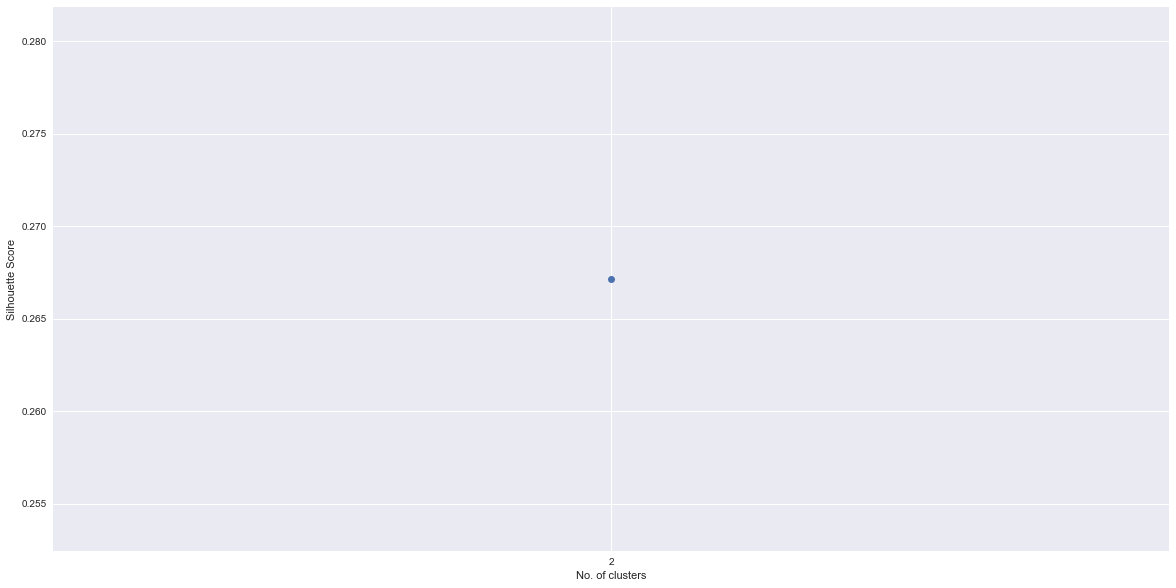

In [221]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

## Visualizing the clusters

In [244]:
# create map
Durban_clusters = folium.Map(location=Durban_map, zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Durban_merged['Latitude'], Durban_merged['Longitude'], Durban_merged['Surbubs'], Durban_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Durban_clusters)
    
Durban_clusters

### Examining each cluster

In [240]:
Durban_merged.loc[Durban_merged['Cluster Labels'] == 1,Durban_merged.columns[[0] + list(range(3, Durban_merged.shape[1]))]]

Surbubs  Cluster Labels 1st Most Common Venue  \
5          Bellaire, Durban               1           Coffee Shop   
13             Durban North               1                  Café   
16                 Gillitts               1                  Café   
17  Glenwood, KwaZulu-Natal               1                  Café   
23                 La Lucia               1           Coffee Shop   
28        Montclair, Durban               1           Coffee Shop   
30     Mount Vernon, Durban               1                  Café   
33    Ottawa, KwaZulu-Natal               1           Coffee Shop   
39          Reservoir Hills               1     Indian Restaurant   
44      South Beach, Durban               1                 Hotel   
45    Stamford Hill, Durban               1           Coffee Shop   
54          Wiggins, Durban               1           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
5           Grocery Store                  Café  Portuguese Restaurant   
13          Grocery Store           Coffee Shop      Indian Restaurant   
16          Grocery Store           Coffee Shop   Fast Food Restaurant   
17            Coffee Shop    Seafood Restaurant      Indian Restaurant   
23          Shopping Mall          Burger Joint      Indian Restaurant   
28      Indian Restaurant                  Café             Restaurant   
30      Indian Restaurant           Coffee Shop          Grocery Store   
33             Steakhouse         Grocery Store     Italian Restaurant   
39            Coffee Shop                  Café           Burger Joint   
44            Coffee Shop                  Café             Restaurant   
45  Portuguese Restaurant         Shopping Mall             Steakhouse   
54                   Café                 Hotel            Pizza Place   

    5th Most Common Venue  
5              Steakhouse  
13   Fast Food Restaurant  
16  Portuguese Restaurant  
17          Shopping Mall  
23     Mexican Restaurant  
28           Burger Joint  
30             Restaurant  
33      Indian Restaurant  
39             Restaurant  
44            Pizza Place  
45             Restaurant  
54  Portuguese Restaurant

Cluster 1 is the most concetrated cluster. This cluster contains businesses in Central, and Western part of Durban. The most common venues in this cluster are Coffee shops, Cafes,Grocery stores,  indian restaurant and Portuguese Restauran. Pizza Places and Fast Food restaurants are also Common in this cluster.

In [241]:
Durban_merged.loc[Durban_merged['Cluster Labels'] == 2,Durban_merged.columns[[0] + list(range(3, Durban_merged.shape[1]))]]

Surbubs  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9   Botha's Hill               2                  Café          Burger Joint   
12   Cowies Hill               2          Burger Joint                  Café   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  
9     Italian Restaurant  Portuguese Restaurant     Convenience Store  
12    Italian Restaurant      Convenience Store     Indian Restaurant

With only two suburbs this cluster has a mixture of Cafes, Burger Joints and Italian Restaurant as popular venues. This Cluster is located in the Western region of Durban. Other common business venues in this area are, Indian Restaurant and Convenience Stores.

In [242]:
Durban_merged.loc[Durban_merged['Cluster Labels'] == 3,Durban_merged.columns[[0] + list(range(3, Durban_merged.shape[1]))]]

Surbubs  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22  KwaMashu               3                  Café    Italian Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
22             Gastropub          Liquor Store         Shopping Mall

Cluster 3 is a one-suburb cluster located in KwaMashu Township in North Durban. The cluster has a mixture of cafes, Italian restaurants, and liquor stores as common business venues.

In [243]:
Durban_merged.loc[Durban_merged['Cluster Labels'] == 4,Durban_merged.columns[[0] + list(range(3, Durban_merged.shape[1]))]]

Surbubs  Cluster Labels 1st Most Common Venue  \
31  Musgrave, Durban               4                 Hotel   
43  Sherwood, Durban               4                 Hotel   
50            Umlazi               4                 Hotel   

   2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
31            Restaurant                 Beach           Burger Joint   
43            Restaurant    Seafood Restaurant                  Beach   
50            Restaurant                  Café  Portuguese Restaurant   

   5th Most Common Venue  
31    Seafood Restaurant  
43  Fast Food Restaurant  
50            Steakhouse

Cluster 4 is concentrated with Hotels and general Restaurant. This cluster located on the  is the most Beach side of the Durban mainly in Umlazi, Sherwood and Musgrave.